In [10]:
import pandas as pd
import nltk,string
from gensim.models import word2vec
import logging
import pandas as pd
from nltk.corpus import stopwords
from keras.utils import to_categorical
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

# Load data
data=pd.read_csv('/Users/revathyramasundaram/revathy/Stevens/BIA-660-Web-mining/yelp_dataset/il_reviews.csv', header=0)
# data=pd.read_csv('semEval-2016-Labelled.csv', header=0)


stop_words = list(stopwords.words('english'))

sentences=[ [token.strip(string.punctuation).strip() \
             for token in nltk.word_tokenize(doc.lower()) \
                 if token not in stop_words and token not in string.punctuation and \
                 len(token.strip(string.punctuation).strip())>=2]\
             for doc in data["text"]]

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', \
                    level=logging.INFO)
size = 200
wv_model = word2vec.Word2Vec(sentences, \
            min_count=5, size=200, iter=10,\
            window=5, workers=4 )

2019-05-06 23:02:58,165 : INFO : collecting all words and their counts
2019-05-06 23:02:58,167 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-05-06 23:02:58,316 : INFO : PROGRESS: at sentence #10000, processed 528482 words, keeping 23601 word types
2019-05-06 23:02:58,327 : INFO : collected 24608 word types from a corpus of 572509 raw words and 10848 sentences
2019-05-06 23:02:58,328 : INFO : Loading a fresh vocabulary
2019-05-06 23:02:58,371 : INFO : effective_min_count=5 retains 7066 unique words (28% of original 24608, drops 17542)
2019-05-06 23:02:58,372 : INFO : effective_min_count=5 leaves 545388 word corpus (95% of original 572509, drops 27121)
2019-05-06 23:02:58,416 : INFO : deleting the raw counts dictionary of 24608 items
2019-05-06 23:02:58,417 : INFO : sample=0.001 downsamples 44 most-common words
2019-05-06 23:02:58,419 : INFO : downsampling leaves estimated 503659 word corpus (92.3% of prior 545388)
2019-05-06 23:02:58,457 : INFO : estima

Top 50 words similar to word 'food'
[('crust', 0.7585016489028931), ('pizzas', 0.7419396638870239), ('thin', 0.6461019515991211), ('toppings', 0.6056853532791138), ('del', 0.5488231778144836), ('antonio', 0.538223385810852), ('papa', 0.5352693200111389), ('crusts', 0.5298538208007812), ('monical', 0.5192587971687317), ('slice', 0.5058605670928955), ('gluten-free', 0.49194204807281494), ('slices', 0.4881991744041443), ('margherita', 0.4800284504890442), ('blaze', 0.45770028233528137), ('sausage', 0.4563046097755432), ('dels', 0.4520866870880127), ('pepperoni', 0.45035114884376526), ('dough', 0.44366079568862915), ('calzones', 0.44062545895576477), ('cracker', 0.4395279288291931), ('oven', 0.4376671612262726), ('vinny', 0.4346999526023865), ('thin-crust', 0.4296649992465973), ('jets', 0.4219565987586975), ('hut', 0.4158150553703308), ('azzip', 0.41258829832077026), ('saltine', 0.4116310477256775), ('monicals', 0.40622708201408386), ('filippo', 0.4031929075717926), ('gluten', 0.3970035612

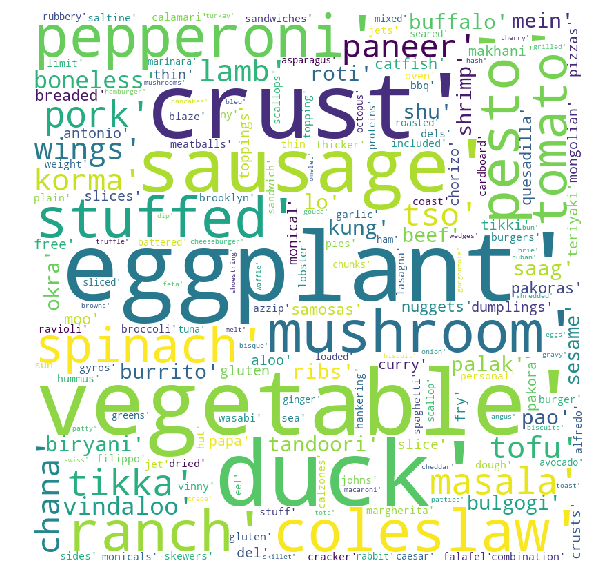

In [44]:
#Wordcloud for food
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

chicken = wv_model.wv.most_similar('chicken', topn=50)
food_aspect_terms = [f[0] for f in chicken]
pizza = wv_model.wv.most_similar('pizza', topn=50)
food_aspect_terms.extend([f[0] for f in pizza])
pasta = wv_model.wv.most_similar('pasta', topn=50)
food_aspect_terms.extend([f[0] for f in pasta])
t = wv_model.wv.most_similar('bacon', topn=50)
food_aspect_terms.extend([f[0] for f in t])



wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(str(food_aspect_terms))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

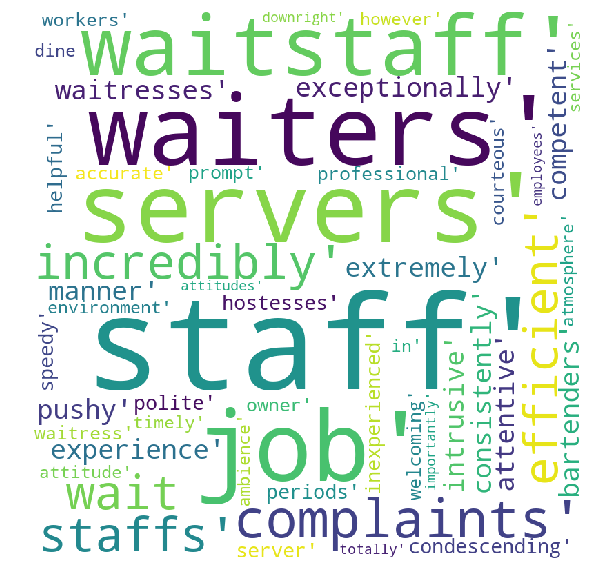

In [34]:
#wordcloud for service aspect
service_aspect_terms = wv_model.wv.most_similar('service', topn=50)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(str(service_aspect_terms))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

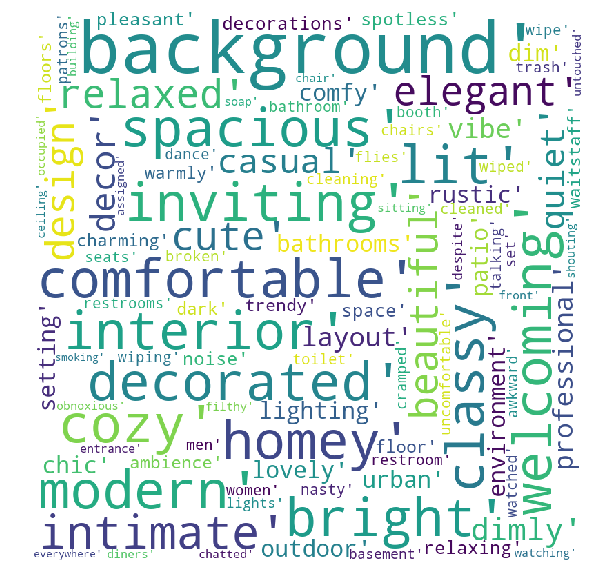

In [42]:
#WordCloud for cleanliness aspect term
cleanliness_aspect_terms = wv_model.wv.most_similar('clean', topn=50)
cleanliness_aspect_terms.extend(wv_model.wv.most_similar('dirty', topn=50))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(str(cleanliness_aspect_terms))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

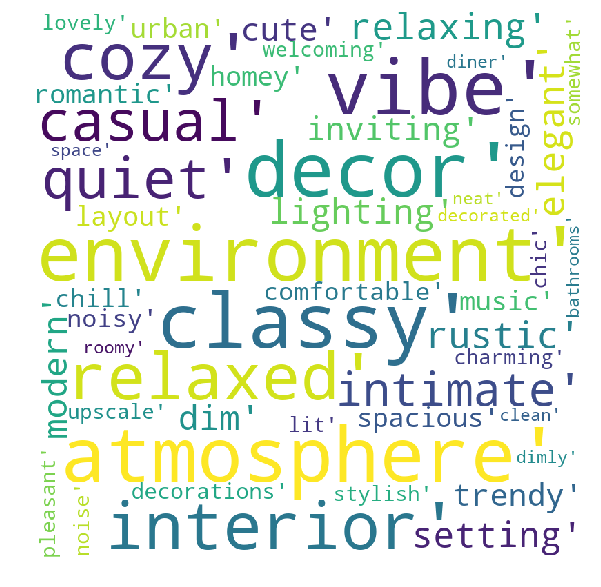

In [40]:
#WordCloud for cleanliness aspect term
ambience_aspect_terms = wv_model.wv.most_similar('ambience', topn=50)
# cleanliness_aspect_terms.extend(wv_model.wv.most_similar('dirty', topn=50))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(str(ambience_aspect_terms))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 